# First Project about Data Visualisation Techniques - 2nd Semester
Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
 
The file “board_games.csv”

I imported the main libraries to begin analysing the game board data. I used Pandas to simplify data organization and facilitate data manipulation. Numpy is employed for mathematical and statistical operations. Matplotlib is essential for creating charts, graphs, and plots to visualize data, while Seaborn enhances data visualization with aesthetically pleasing and informative visualizations. SciPy is utilized for statistical tests, and '%matplotlib inline' is a special command to display Matplotlib plots correctly within Jupyter Notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
sns.set()
%matplotlib inline

reading the data and check the first rows

In [2]:
df= pd.read_csv('board_games.csv')

df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


Checking for more details about the data using '.info' and '.shape', which provide the total number of rows and features, the column names, the quantities of missing values, and the data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [4]:
df.shape

(10532, 22)

We observe the data set contain 10532 rows and 22 features, the are mix of numbers and string values and some of the columns are missing data.

Checking missing values

In [5]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("board_games.csv", na_values = missing_value_formats)

In [6]:
df.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

I decided not to treat the missing values for now because the variable we will use for the task does not have any missing data.

### What are the top 5 “average rated” games?

I will calculate the average rating for each game and then organise the games based on their average ratings.

In [7]:
average_ratings = df.groupby('name')['average_rating'].mean()

Sort the games by average rating in descending order

In [8]:
top_games = average_ratings.sort_values(ascending=False).head(5)

Extract the game titles and average ratings from the top_games DataFrame.

Create a bar plot to visualize the top 5 games.

Invert the y-axis to display the highest rated game at the top.

Annotate the bars with their respective scores.

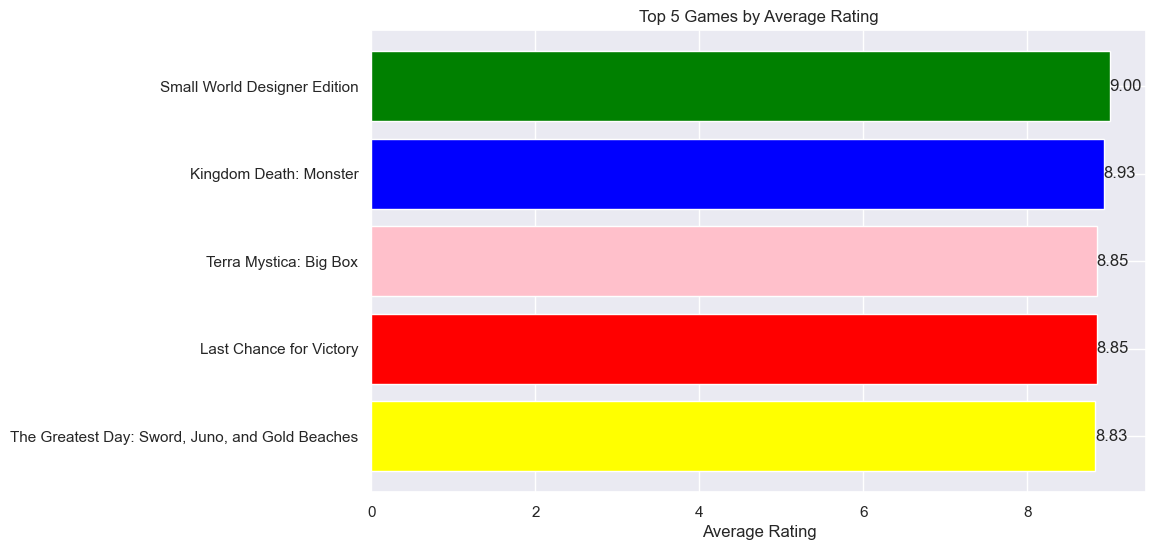

In [9]:
game_titles = top_games.index
average_ratings = top_games.values

plt.figure(figsize=(10, 6))
bars = plt.barh(game_titles, average_ratings, color=["green","blue","pink","red",'yellow'])
plt.xlabel('Average Rating')
plt.title('Top 5 Games by Average Rating')
plt.gca().invert_yaxis()  

for bar, rating in zip(bars, average_ratings):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rating:.2f}', va='center')

plt.show()


 Matplotlib was chosen as the library to create this bar plot because of its versatility and wide adoption in the Python data visualization community.
 It allows for the creation of clear and customizable visualizations, making it suitable for showcasing the top 5 games by average rating.
 A list of colors is specified to enhance the visual appeal, and scores for each game are added to help the audience quickly identify the highest-rated games.
 

### Is there a correlation between the “users_rated” and the “max_playtime”?

In [11]:
correlation = df['users_rated'].corr(df['max_playtime'])

In [12]:
correlation

-0.004341647333776701

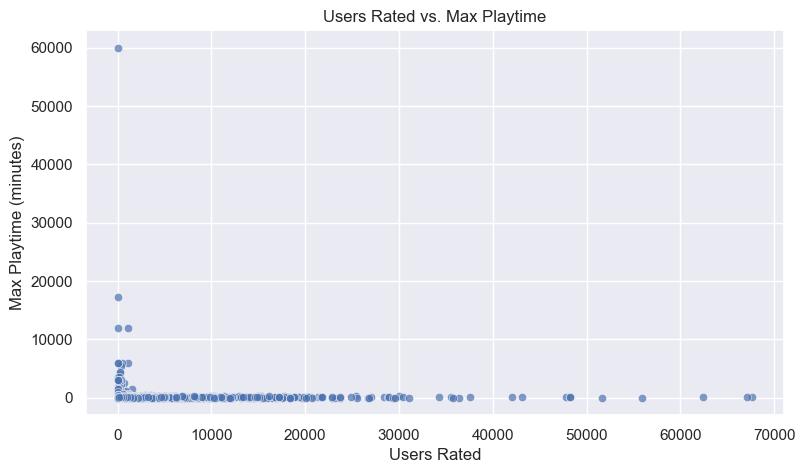

In [10]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='users_rated', y='max_playtime',alpha=0.7);
plt.xlabel('Users Rated')
plt.ylabel('Max Playtime (minutes)')
plt.title('Users Rated vs. Max Playtime')
plt.grid(True)
plt.show()


I utilized Matplotlib to create a scatter plot, aiming to investigate the correlation between the 'Max_Playtime' and 'Users_Rated' features. Scatter plots are a valuable tool for visualizing and assessing the relationships between variables, allowing us to uncover patterns and trends within the data. In this specific plot, the data points tightly clustered around no Discernible Trend. While there may be a relationship, it is not linear or it is very weak between the two variables.

#  What is the distribution of game categories? (You may not use a barchart) 

Checking how many unique values there are in the 'category' column.

In [13]:
df.category.nunique()

3860

In [14]:
#!pip install wordcloud

In [15]:
from wordcloud import WordCloud

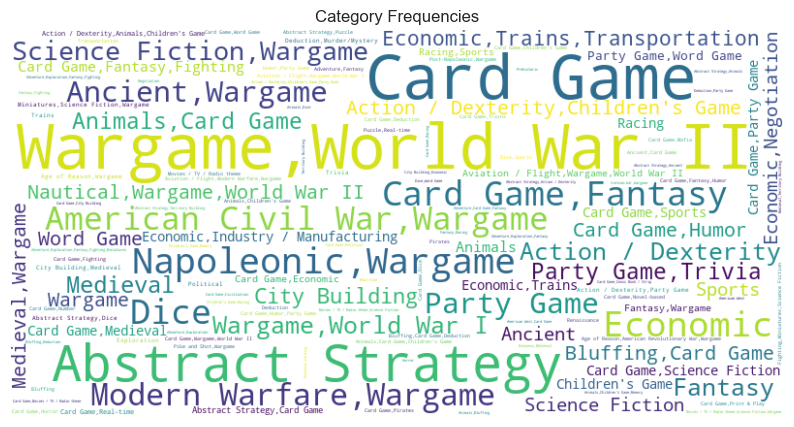

In [16]:
category_counts = df['category'].value_counts()

# Generate a word cloud from the category frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Category Frequencies')
plt.show()

Get the 10 most common values and their frequencies

In [17]:
category_counts = df['category'].value_counts().head(10)


Create a pie chart

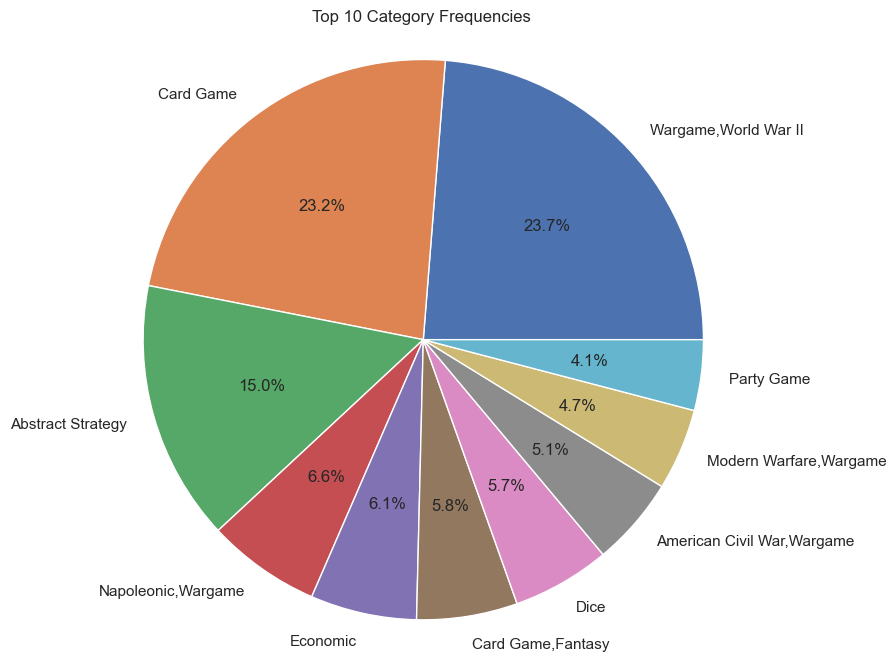

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Category Frequencies')
plt.show()

I tried to visualize the distribution in two different ways since I have a large number of categorical values in this feature. I used a word cloud to examine the frequency of words as they appear, and I also decided to create a pie chart to illustrate the proportions of the 10 most common values. 

## • Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

Checking how looks like the year column 

In [13]:
df.year_published.head(10)

0    1986
1    1981
2    1998
3    1992
4    1964
5    1989
6    1978
7    1993
8    1998
9    1998
Name: year_published, dtype: int64

Filter the dataframe for older and newer games

In [20]:
older_games = df[df['year_published'] <= 1992]
newer_games = df[df['year_published'] > 1992]


Calculating the median for each game and then creating a bar plot.

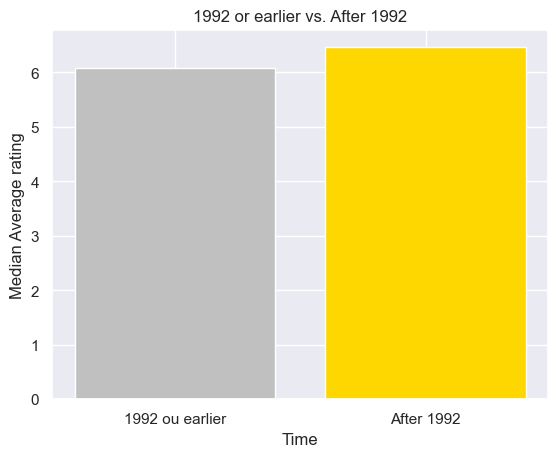

In [21]:
median_average_rating_older = older_games['average_rating'].median()
median_average_rating_newer = newer_games['average_rating'].median()

Years = ['1992 ou earlier', 'After 1992']
median_average_rating = [median_average_rating_older, median_average_rating_newer]

plt.bar(Years, median_average_rating, color=['silver','gold'])
plt.xlabel('Time')
plt.ylabel('Median Average rating')
plt.title('1992 or earlier vs. After 1992');

I chose a bar plot as the ideal visualization method to compare medians across different years. Bar plots are effective for comparing values, and in this case, they help us analyze how the median has changed over time.
For this particular question, I opted for a bar plot to compare the medians between the years. I selected the colors yellow and gray. Yellow, being a vibrant color, is used to draw attention to the period after 1992 when the average rating shows improvement. This color choice highlights the specific point of interest and aids in visually emphasizing the observed trend.

## What are the 5 most common “mechanics” in the dataset?

Examining the content and unique values in the 'mechanic' column.

In [18]:
df.mechanic.head()

0    Area Control / Area Influence,Auction/Bidding,...
1                                         Trick-taking
2    Area Control / Area Influence,Hand Management,...
3    Action Point Allowance System,Area Control / A...
4         Hand Management,Stock Holding,Tile Placement
Name: mechanic, dtype: object

In [19]:
df.mechanic.nunique()

3209

Get the top N categories by frequency.
Filter the DataFrame to include only the top categories.

In [25]:
top_n = 5

top_mechanic = df['mechanic'].value_counts().head(top_n).index

df_filtered = df[df['mechanic'].isin(top_mechanic)]

Create a countplot.
Add frequency percentages as text on the bars.

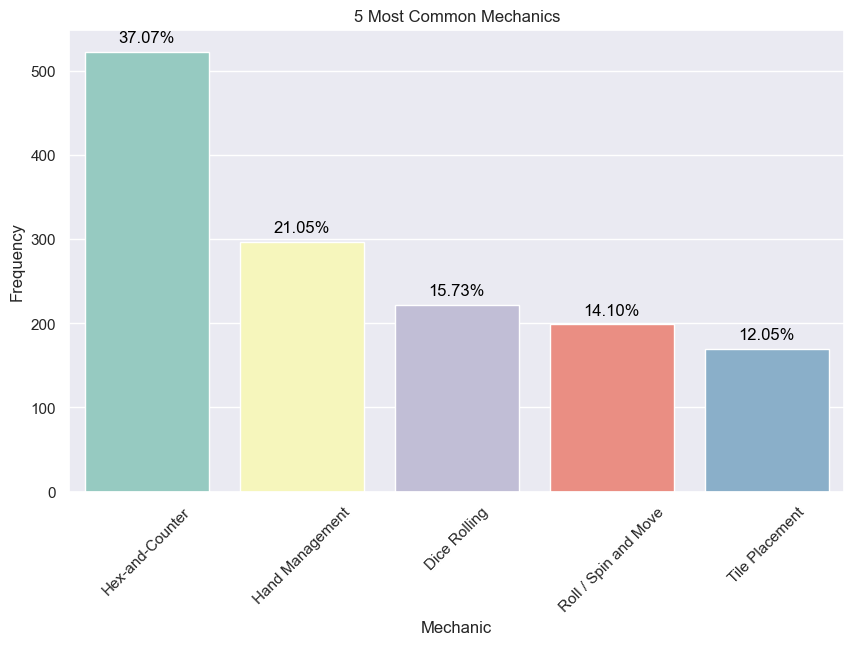

In [26]:
top_mechanics = df_filtered['mechanic'].value_counts().head(top_n)
total_count = len(df_filtered)
percentage = (top_mechanics / total_count) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtered, x='mechanic', order=top_mechanics.index, palette='Set3', color='g')

for p, label in zip(ax.patches, percentage):
    ax.annotate(f'{label:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('5 Most Common Mechanics')
plt.xlabel('Mechanic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

I chose to use the countplot function to visualize the five most common categories in the 'mechanics' column. I arranged the categories in descending order of frequency, displaying the proportions they represent in the dataset. To enhance the visual experience, I opted for pastel tones. Pastel colours, known for their calming and gentle appeal, not only ensure pleasant viewing but also add a touch of professionalism and elegance to the visualization. This careful selection of colours aims to create an aesthetically pleasing chart while maintaining a sense of refinement, aligning with the presentation's overall tone and purpose.

## • You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario

Create bar charts to identify the top designers based on the number of games they have published.

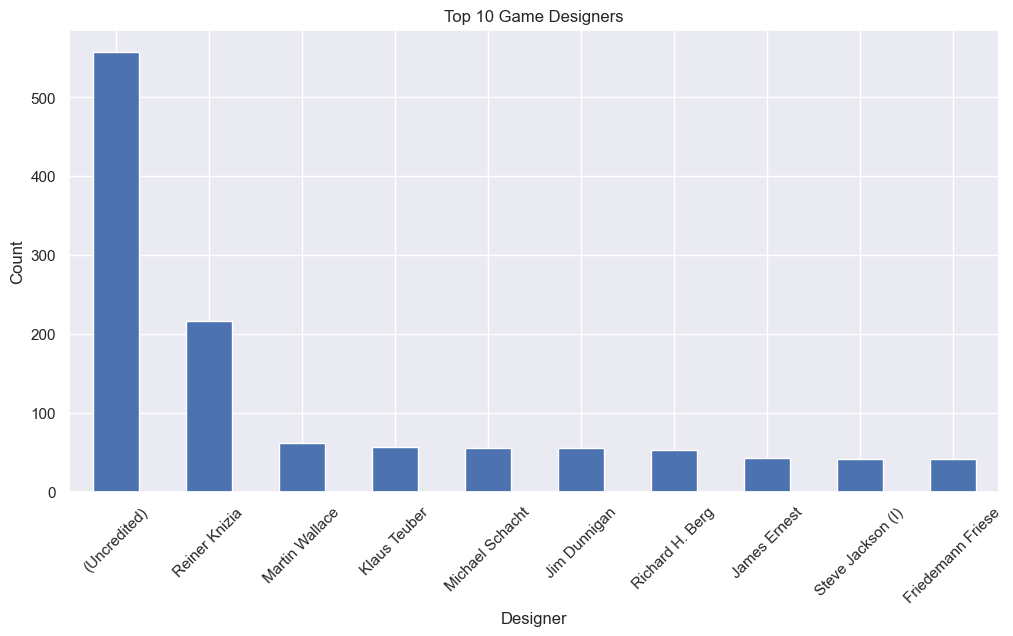

In [67]:
designer_counts = df['designer'].value_counts()

# Choose the top N designers you want to display
top_n = 10
top_designers = designer_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_designers.plot(kind='bar')
plt.title(f'Top {top_n} Game Designers')
plt.xlabel('Designer')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Create a time series plot to see how the number of games published has changed over time.

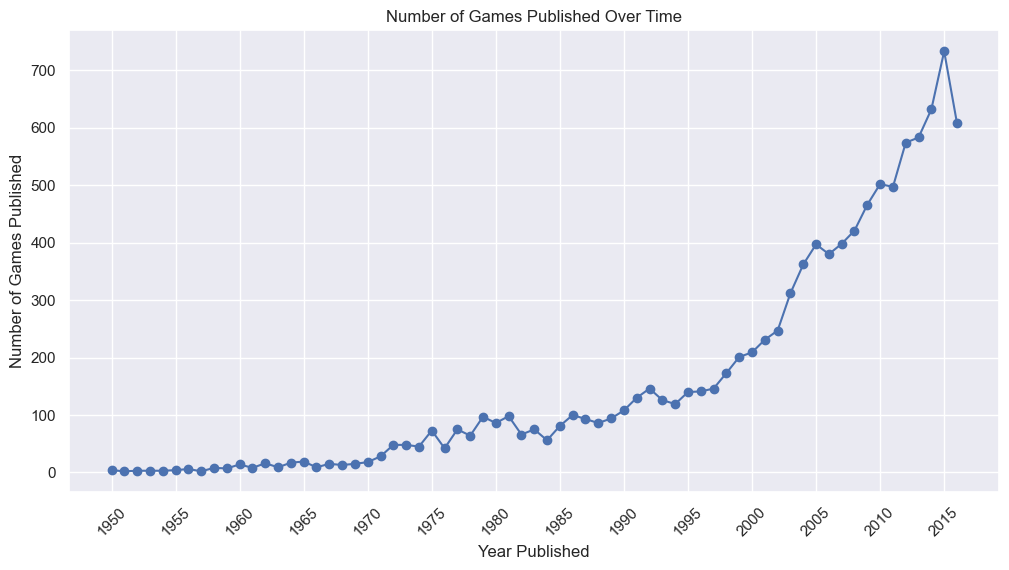

In [68]:
games_per_year = df['year_published'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('Number of Games Published Over Time')
plt.xlabel('Year Published')
plt.ylabel('Number of Games Published')
plt.grid(True)

n = 5
plt.xticks(games_per_year.index[::n], rotation=45)

plt.show()